In [1]:
import itertools
import numpy as np
import pandas as pd
import missingno as msno 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Tauseef Ahmed\Downloads\CSV\data_diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


In [3]:
df.shape

(2000, 9)

## DATA PREPROCESSING 

### Checking if dataset contains any NULL value 

In [5]:
missing_data = df.isnull()
missing_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [6]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Pregnancies
False    2000
Name: Pregnancies, dtype: int64

Glucose
False    2000
Name: Glucose, dtype: int64

BloodPressure
False    2000
Name: BloodPressure, dtype: int64

SkinThickness
False    2000
Name: SkinThickness, dtype: int64

Insulin
False    2000
Name: Insulin, dtype: int64

BMI
False    2000
Name: BMI, dtype: int64

DiabetesPedigreeFunction
False    2000
Name: DiabetesPedigreeFunction, dtype: int64

Age
False    2000
Name: Age, dtype: int64

Outcome
False    2000
Name: Outcome, dtype: int64



<AxesSubplot:>

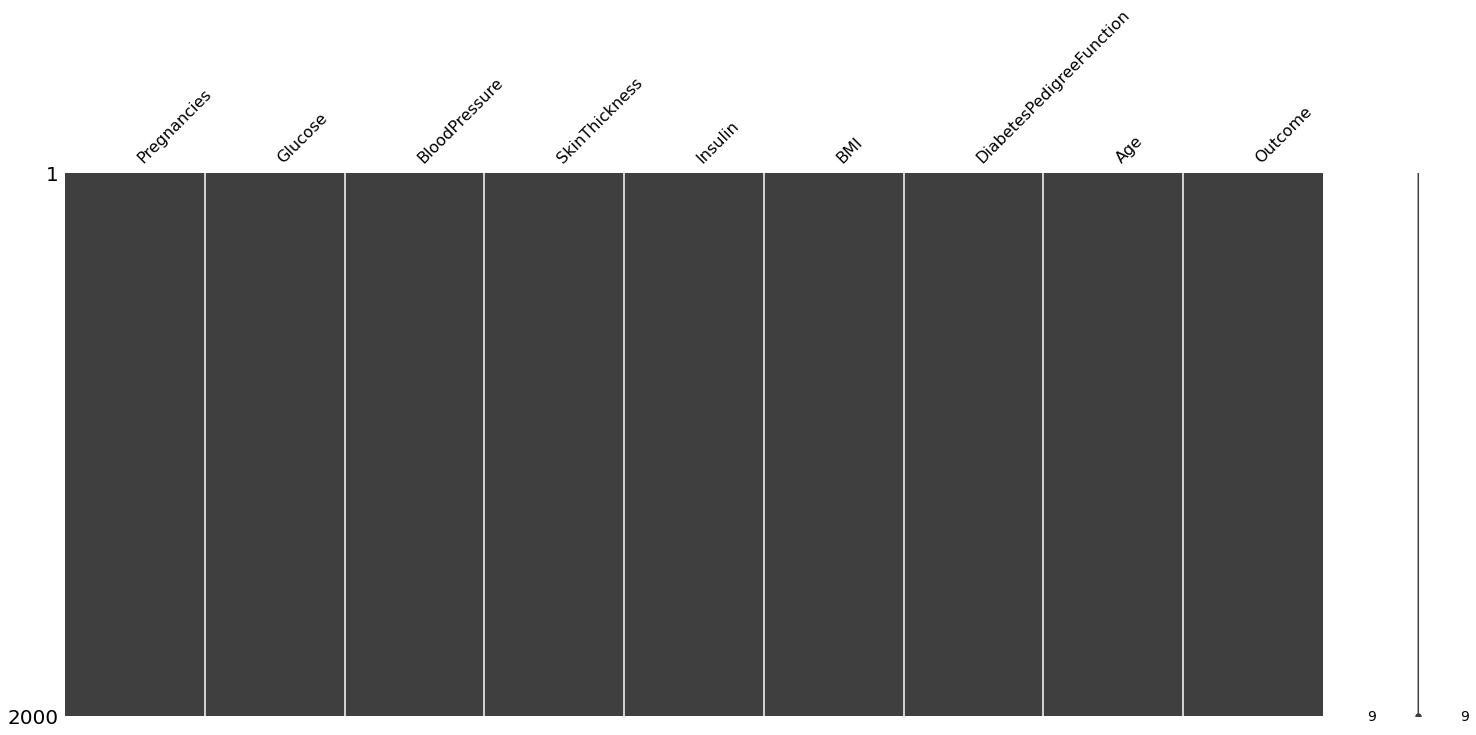

In [9]:
msno.matrix(df)

## Understanding data present  

In [10]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


## Understanding Target Value

In [12]:
df['Outcome'].value_counts() 

0    1316
1     684
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

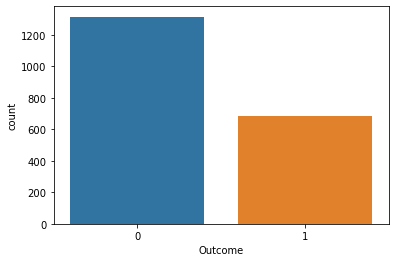

In [19]:
sns.countplot(x='Outcome',data=df)

## Attributes' value distribution

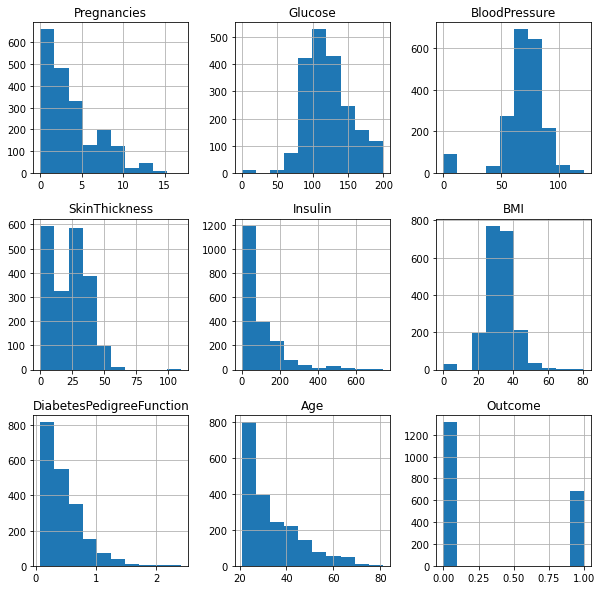

In [20]:
df.hist(bins=10,figsize=(10,10))
plt.show()

## Correlation between attributes

In [21]:
corr = df.corr()
corr.style.background_gradient().set_precision(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.0,0.1,0.1,-0.1,-0.1,0.0,-0.0,0.5,0.2
Glucose,0.1,1.0,0.1,0.1,0.3,0.2,0.1,0.3,0.5
BloodPressure,0.1,0.1,1.0,0.2,0.1,0.3,0.1,0.2,0.1
SkinThickness,-0.1,0.1,0.2,1.0,0.4,0.4,0.2,-0.1,0.1
Insulin,-0.1,0.3,0.1,0.4,1.0,0.2,0.2,-0.1,0.1
BMI,0.0,0.2,0.3,0.4,0.2,1.0,0.1,0.0,0.3
DiabetesPedigreeFunction,-0.0,0.1,0.1,0.2,0.2,0.1,1.0,0.0,0.2
Age,0.5,0.3,0.2,-0.1,-0.1,0.0,0.0,1.0,0.2
Outcome,0.2,0.5,0.1,0.1,0.1,0.3,0.2,0.2,1.0


<AxesSubplot:>

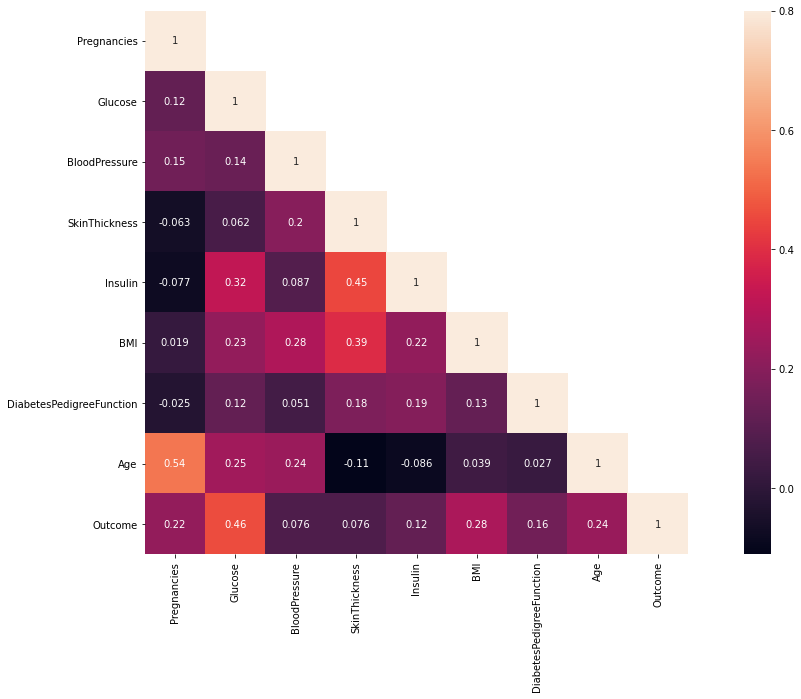

In [17]:
corrMatt = df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

## Distribution of values using Box Plots

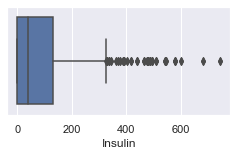

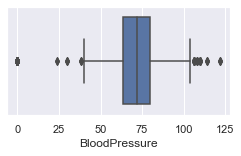

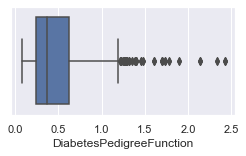

In [28]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['Insulin'])
plt.show()
sns.boxplot(x=df['BloodPressure'])
plt.show()
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.show()

### Removing outliers 

The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

In [5]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n\n",Q1)
print("\n---Q3--- \n\n",Q3)
print("\n---IQR---\n\n",IQR)

---Q1--- 

 Pregnancies                  1.000
Glucose                     99.000
BloodPressure               63.500
SkinThickness                0.000
Insulin                      0.000
BMI                         27.375
DiabetesPedigreeFunction     0.244
Age                         24.000
Outcome                      0.000
Name: 0.25, dtype: float64

---Q3--- 

 Pregnancies                   6.000
Glucose                     141.000
BloodPressure                80.000
SkinThickness                32.000
Insulin                     130.000
BMI                          36.800
DiabetesPedigreeFunction      0.624
Age                          40.000
Outcome                       1.000
Name: 0.75, dtype: float64

---IQR---

 Pregnancies                   5.000
Glucose                      42.000
BloodPressure                16.500
SkinThickness                32.000
Insulin                     130.000
BMI                           9.425
DiabetesPedigreeFunction      0.380
Age              

In [32]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape

((2000, 9), (1652, 9))

# MODEL BUILDING

## Feature Extraction 

In [6]:
Feature = df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
Feature.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21


In [31]:
X = Feature
X[0:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21


## Target Extraction of categorical data

In [32]:
y = df['Outcome'].values
y[0:5]

array([1, 0, 1, 1, 0], dtype=int64)

## Classification 

##### We will use following classification algorithms and compare which gives better accuracy 
##### K Nearest Neighbor(KNN)
##### Decision Tree
##### Support Vector Machine
##### Logistic Regression

## K Nearest Neighbor(KNN)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [10]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error Rate')

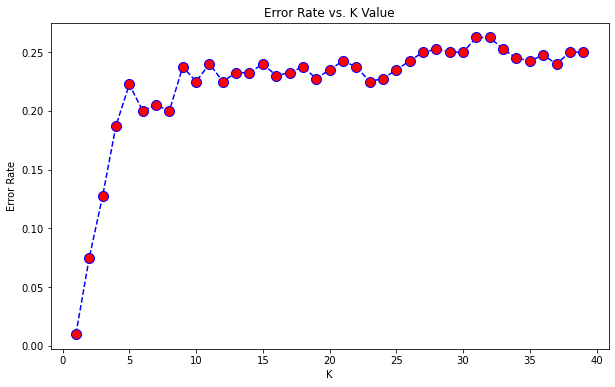

In [11]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We can see that at k=8, error rate is minimum and is the point where steep starts

### Model Evaluation using Test set

In [16]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
pred_i = knn.predict(X_test)
print('CONFUSION_MATRIX :\n')
print(confusion_matrix(pred_i,y_test),"\n")
print('REPORT :\n')
print(classification_report(pred_i,y_test))

CONFUSION_MATRIX :

[[231  47]
 [ 35  87]] 

REPORT :

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       278
           1       0.65      0.71      0.68       122

    accuracy                           0.80       400
   macro avg       0.76      0.77      0.76       400
weighted avg       0.80      0.80      0.80       400



In [74]:
list_fs=[]
list_fs.append(accuracy_score(pred_i,y_test))
print('ACCURACY :')
accuracy_score(pred_i,y_test)

ACCURACY :


0.795

## Decision Tree 

In [75]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
classification = dc.fit(X_train,y_train)
prediction = dc.predict(X_test)
prediction

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,

### Model Evaluation using Test set

In [76]:
print('CONFUSION_MATRIX :\n')

print(confusion_matrix(prediction,y_test))

CONFUSION_MATRIX :

[[265   7]
 [  1 127]]


In [77]:
print('REPORT :\n')
print(classification_report(prediction,y_test))

REPORT :

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       272
           1       0.95      0.99      0.97       128

    accuracy                           0.98       400
   macro avg       0.97      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [78]:
print('ACCURACY :\n')
list_fs.append(accuracy_score(prediction,y_test))
accuracy_score(prediction,y_test)

ACCURACY :



0.98

## Support Vector Machine

In [79]:
from sklearn import svm
svc = svm.SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_preds = svc.predict(X_test)
y_preds

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,

### Model Evaluation using Test set

In [80]:
print('CLASSIFICATION_REPORT :\n')
print(metrics.classification_report(y_preds,y_test))

CLASSIFICATION_REPORT :

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       301
           1       0.52      0.71      0.60        99

    accuracy                           0.77       400
   macro avg       0.71      0.75      0.72       400
weighted avg       0.80      0.77      0.78       400



In [81]:
print('CONFUSION MATRIX :\n')
print(metrics.confusion_matrix(y_preds,y_test))

CONFUSION MATRIX :

[[237  64]
 [ 29  70]]


In [82]:
print('ACCURACY :\n')
list_fs.append(accuracy_score(y_preds,y_test))
print(accuracy_score(y_preds,y_test))

ACCURACY :

0.7675


## Logistic Regression 

In [83]:
from sklearn.linear_model import LogisticRegression
linear = LogisticRegression(fit_intercept=True,solver='lbfgs', max_iter=200)
linear.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [84]:
y_pred = linear.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,

### Model Evaluation using Test set

In [85]:
print('CLASSIFICATION_REPORT :\n');
print(metrics.classification_report(y_pred,y_test))

CLASSIFICATION_REPORT :

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       285
           1       0.58      0.68      0.63       115

    accuracy                           0.77       400
   macro avg       0.72      0.74      0.73       400
weighted avg       0.78      0.77      0.77       400



In [86]:
print('CONFUSION_MATRIX :\n');
print(metrics.confusion_matrix(y_pred,y_test))

CONFUSION_MATRIX :

[[229  56]
 [ 37  78]]


In [87]:
print('ACCURACY_SCORE :\n');
list_fs.append(accuracy_score(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

ACCURACY_SCORE :

0.7675


## FINAL REPORT

In [96]:
df = pd.DataFrame(index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.insert(loc=0, column='Accuracy-score', value=list_fs)
df.columns.name = 'Algorithm'
df

Algorithm,Accuracy-score
KNN,0.7950
Decision Tree,0.9800
SVM,0.7675
Logistic Regression,0.7675


## Conclusion :-
## For this particular dataset Decision Tree predicts the categorical target value with accuracy of 98% much higher than other classification algorithms 